In [0]:
# !pip install datadotworld
# !pip install datadotworld[pandas]

In [0]:
#  !dw configure

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import datadotworld as dw

In [0]:
data_men = dw.load_dataset('datafiniti/mens-shoe-prices')
data_women = dw.load_dataset('datafiniti/womens-shoe-prices')

In [40]:
dfw = data_women.dataframes['7003_1']
dfm = data_men.dataframes['7004_1']

dfm.shape, dfw.shape

((19387, 48), (19045, 47))

In [45]:
dfm.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
9223,AVpe8KYA1cnluZ0-aTol,B013AYNQV2,NaN,"Athletic,Men,Shoes,Shoes & Handbags","Blue,Black,Brown",NaN,2015-11-16T02:56:27Z,2016-05-06T16:28:25Z,NaN,NaN,NaN,NaN,NaN,http://ecx.images-amazon.com/images/I/31Jxn4n5...,NaN,"qianyuyu/6192778599887,yuyusneakermensathletic...",Qianyuyu,6192778599887,"[{""dateSeen"":[""2016-04-28T00:00:00Z""],""name"":""...",Yu&yu Sneaker Men's Athletic Shoes Leatherette...,140.20,140.20,NaN,NaN,new,NaN,CAD,2015-11-16T02:56:27Z,2015-11-14T00:00:00Z,NaN,false,Amazon.ca,NaN,NaN,free,NaN,NaN,https://www.amazon.ca/Sneaker-Athletic-Leather...,NaN,NaN,NaN,NaN,NaN,https://www.amazon.ca/Sneaker-Athletic-Leather...,NaN,NaN,NaN,499 g
11858,AVpfoRG51cnluZ0-oUzR,NaN,Magliner,"Power Tools,Men's Work Gloves,Household Essent...",NaN,NaN,2017-01-03T13:57:25Z,2017-01-03T13:57:25Z,"[{""dateSeen"":[""2016-10-31T00:26:12Z""],""sourceU...",12 in x 5.5 in x 13.5 in,NaN,"[{""key"":""Fits brands"",""value"":[""Magliner""]},{""...",NaN,http://www.homedepot.com/catalog/productImages...,NaN,"magliner/302682,magliner302682accessorybagcanv...",Magliner,302682,"[{""dateSeen"":[""2017-01-03T13:57:25Z""],""name"":""...","Magliner 302682 Accessory Bag,canvas,18 In X 1...",53.49,53.49,NaN,NaN,New,NaN,USD,2017-01-03T13:57:25Z,2016-02-14T00:00:00Z,NaN,false,Wayfair.com,NaN,90-Day,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,One year warranty from date of purchase agains...,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN
5054,AVpfLkq7ilAPnD_xWqdF,NaN,Tommie Copper,"Clothing, Shoes & Accessories,Athletic Apparel...",Yellow,NaN,2016-02-02T14:38:02Z,2016-05-18T20:23:27Z,NaN,NaN,8.400011e+11,"[{""key"":""Style"",""value"":[""Shirts & Tops""]},{""k...",NaN,http://i.ebayimg.com/images/g/nUgAAOSwCypWmVmq...,NaN,tommiecopper6521newmensvelocityyellowcrewneckt...,NaN,NaN,"[{""dateSeen"":[""2016-05-18T00:00:00Z""],""name"":""...",Tommie Copper 6521 New Mens Velocity Yellow Cr...,3.93,3.93,NaN,NaN,New with tags,NaN,USD,2016-02-02T14:38:02Z,2016-01-31T00:00:00Z,NaN,false,NaN,winning bid,NaN,USD 5.99,NaN,NaN,http://www.ebay.com/itm/TOMMIE-COPPER-6521-NEW...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com/itm/TOMMI...",http://www.ebay.com/itm/TOMMIE-COPPER-6521-NEW...,840001117112,NaN,NaN,NaN
871,AVpe99dVLJeJML43zb-2,NaN,3N2 Sports,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-06-08T05:29:29Z,2016-10-05T22:39:15Z,"[{""dateSeen"":[""2016-06-17T09:15:05Z""],""sourceU...",NaN,8.450990e+11,"[{""key"":""Shoe Size"",""value"":[""US 11""]},{""key"":...",NaN,https://i5.walmartimages.com/asr/3c8f41ab-b5d8...,NaN,"845099030541,3n2/510001110,0845099030541,3n2sp...","3N2, LLC",5100-01-110,"[{""dateSeen"":[""2016-06-08T05:29:29Z""],""name"":""...",Slide Shower Sandal - Black (10),53.74,53.74,NaN,NaN,new,NaN,USD,2016-06-08T05:29:29Z,2016-10-05T00:00:00Z,NaN,true,ShopLadder - Walmart.com,REDUCED USD 29.06,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/3N2-Men-s-Slide-San...,NaN,NaN,NaN,"10,11,12,13,14,15,6,7,8,9",NaN,https://www.walmart.com/ip/3N2-Men-s-Slide-San...,845099030541,NaN,NaN,NaN
15364,AVpf2UHzilAPnD_xjYxC,NaN,Lugz,"All Men's Shoes,Shoes,Men's Shoes,Clothing",Golden,NaN,2017-01-12T06:20:29Z,2017-01-12T06:20:29Z,"[{""dateSeen"":[""2017-01-12T06:20:29Z""],""sourceU...",NaN,7.371823e+11,"[{""key"":""Occasion"",""value"":[""Work Utility""]},{...",NaN,https://i5.walmartimages.com/asr/21f95704-b8e9...,NaN,"07371823182

In [53]:
dfm.columns, dfw.columns

(Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
        'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
        'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
        'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
        'prices_amountmax', 'prices_availability', 'prices_color',
        'prices_condition', 'prices_count', 'prices_currency',
        'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
        'prices_merchant', 'prices_offer', 'prices_returnpolicy',
        'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
        'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
        'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
       dtype='object'),
 Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
        'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
        'flavors', 'imageurls', 'isbn', 'keys', 'manufac

In [56]:
dfm.prices_currency.unique(), dfm.prices_currency.unique()

(array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
        'UnbeatableSale.com, Inc. - Walmart.com',
        'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
        'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
        'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object),
 array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
        'UnbeatableSale.com, Inc. - Walmart.com',
        'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
        'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
        'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object))

In [28]:
dfm.prices_currency.value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
PalmBeach Jewelry - Walmart.com                       0.000155
UnbeatableSale.com, Inc. - Walmart.com                0.000155
new                                                   0.000155
New with box                                          0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
New without tags                                      0.000052
Shoes.com                                             0.000052
SHOEBACCA LTD. - Walmart.com                          0.000052
Name: prices_currency, dtype: float64

In [57]:
dfw.prices_currency.value_counts(normalize=True)

USD                               0.956031
CAD                               0.033515
AUD                               0.006199
EUR                               0.003362
GBP                               0.000788
new                               0.000053
Off Price Direct - Walmart.com    0.000053
Name: prices_currency, dtype: float64

In [58]:
dfm_usd = dfm[ dfm.prices_currency == 'USD' ].copy()
dfw_usd = dfw[ dfw.prices_currency == 'USD' ].copy()
dfm_usd.shape, dfw_usd.shape

((18524, 48), (18199, 47))

In [60]:
dfm_usd.prices_amountmin.head(), dfw_usd.prices_amountmin.head()

(0    39.89
 1    51.99
 2    40.02
 3    50.31
 4    46.26
 Name: prices_amountmin, dtype: object, 0    71.99
 1      250
 2    75.99
 3    79.98
 4    26.98
 Name: prices_amountmin, dtype: object)

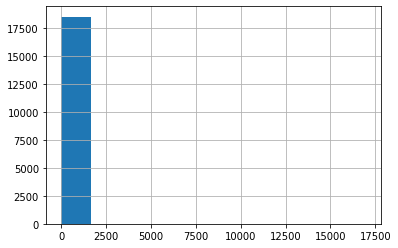

In [62]:
dfm_usd['prices_amountmin'] = dfm_usd.prices_amountmin.astype(np.float)
dfw_usd['prices_amountmin'] = dfw_usd.prices_amountmin.astype(np.float)
dfm_usd['prices_amountmin'].hist()

In [63]:
filter_max_m = np.percentile(dfm_usd['prices_amountmin'], 99)
filter_max_w = np.percentile(dfw_usd['prices_amountmin'], 99)
filter_max_m, filter_max_w

(895.0, 1100.0)

In [0]:
dfm_usd_filter = dfm_usd[ dfm_usd['prices_amountmin'] < filter_max_m]
dfw_usd_filter = dfw_usd[ dfw_usd['prices_amountmin'] < filter_max_w]

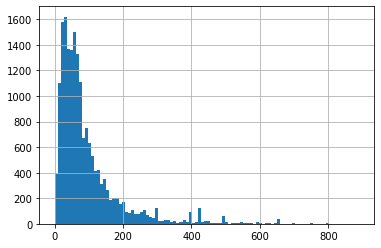

In [65]:
dfm_usd_filter.prices_amountmin.hist(bins=100)

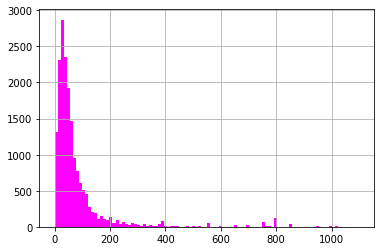

In [67]:
dfw_usd_filter.prices_amountmin.hist(color='magenta', bins=100)

In [0]:
dfm_usd_filter.to_csv('data/shoes_prices_men.csv', index=False)
dfw_usd_filter.to_csv('data/shoes_prices_women.csv', index=False)